# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [3]:
df = pd.read_csv('dataframe_credito_07.csv')
df

,Unnamed: 0,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,0,1,1,0,58.832877,3.106849,1,0,0,...,1,1,0,0,0,1,0,0,0,0
1,1,1,0,1,0,52.356164,8.358904,1,0,1,...,1,0,0,1,0,1,0,0,0,0
2,2,1,0,1,0,52.356164,8.358904,1,0,1,...,1,0,0,1,0,1,0,0,0,0
3,3,0,1,1,0,46.224658,2.106849,1,1,1,...,0,1,0,0,0,1,0,0,0,0
4,4,1,1,0,0,29.230137,3.021918,1,0,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16645,16645,1,0,1,0,54.109589,9.884932,1,0,0,...,1,0,0,0,0,1,0,0,0,0
16646,16646,1,0,1,0,43.389041,7.380822,1,1,1,...,1,1,0,0,0,1,0,0,0,0
16647,16647,0,1,1,0,30.005479,9.800000,1,1,0,...,1,1,0,0,0,1,0,0,0,0
16648,16648,0,1,1,0,30.005479,9.800000,1,1,0,...,1,1,0,0,0,1,0,0,0,0


In [4]:
df.columns

Index(['Unnamed: 0', 'sexo', 'posse_de_veiculo', 'posse_de_imovel',
       'qtd_filhos', 'idade', 'tempo_emprego', 'possui_celular',
       'possui_fone_comercial', 'possui_fone', 'possui_email',
       'qt_pessoas_residencia', 'mau', 'tipo_renda_Pensioner',
       'tipo_renda_State servant', 'tipo_renda_Student', 'tipo_renda_Working',
       'educacao_Higher education', 'educacao_Incomplete higher',
       'educacao_Lower secondary', 'educacao_Secondary / secondary special',
       'estado_civil_Married', 'estado_civil_Separated',
       'estado_civil_Single / not married', 'estado_civil_Widow',
       'tipo_residencia_House / apartment',
       'tipo_residencia_Municipal apartment',
       'tipo_residencia_Office apartment', 'tipo_residencia_Rented apartment',
       'tipo_residencia_With parents'],
      dtype='object')

In [5]:
df['Unnamed: 0']

0            0
1            1
2            2
3            3
4            4
         ...  
16645    16645
16646    16646
16647    16647
16648    16648
16649    16649
Name: Unnamed: 0, Length: 16650, dtype: int64

In [6]:
# Excluindo coluna inválida que apareceu na base após salvar arquivo csv
df.drop('Unnamed: 0', axis=1, inplace=True)
df

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,1,1,0,58.832877,3.106849,1,0,0,0,...,1,1,0,0,0,1,0,0,0,0
1,1,0,1,0,52.356164,8.358904,1,0,1,1,...,1,0,0,1,0,1,0,0,0,0
2,1,0,1,0,52.356164,8.358904,1,0,1,1,...,1,0,0,1,0,1,0,0,0,0
3,0,1,1,0,46.224658,2.106849,1,1,1,1,...,0,1,0,0,0,1,0,0,0,0
4,1,1,0,0,29.230137,3.021918,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16645,1,0,1,0,54.109589,9.884932,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
16646,1,0,1,0,43.389041,7.380822,1,1,1,0,...,1,1,0,0,0,1,0,0,0,0
16647,0,1,1,0,30.005479,9.800000,1,1,0,0,...,1,1,0,0,0,1,0,0,0,0
16648,0,1,1,0,30.005479,9.800000,1,1,0,0,...,1,1,0,0,0,1,0,0,0,0


In [7]:
df.mau.value_counts()

0    16260
1      390
Name: mau, dtype: int64

In [8]:
# Separando a variável target
y = df.mau
y

0        0
1        0
2        0
3        0
4        0
        ..
16645    1
16646    1
16647    1
16648    1
16649    1
Name: mau, Length: 16650, dtype: int64

In [9]:
# Separando as variáveis explicativas
X = df.drop('mau', axis=1)
X

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,1,1,0,58.832877,3.106849,1,0,0,0,...,1,1,0,0,0,1,0,0,0,0
1,1,0,1,0,52.356164,8.358904,1,0,1,1,...,1,0,0,1,0,1,0,0,0,0
2,1,0,1,0,52.356164,8.358904,1,0,1,1,...,1,0,0,1,0,1,0,0,0,0
3,0,1,1,0,46.224658,2.106849,1,1,1,1,...,0,1,0,0,0,1,0,0,0,0
4,1,1,0,0,29.230137,3.021918,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16645,1,0,1,0,54.109589,9.884932,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
16646,1,0,1,0,43.389041,7.380822,1,1,1,0,...,1,1,0,0,0,1,0,0,0,0
16647,0,1,1,0,30.005479,9.800000,1,1,0,0,...,1,1,0,0,0,1,0,0,0,0
16648,0,1,1,0,30.005479,9.800000,1,1,0,0,...,1,1,0,0,0,1,0,0,0,0


In [10]:
# Separando variáveis de treino e de teste, aplicando a distribuição 70% treino e 30& para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [11]:
X_train

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
13649,1,0,0,1,31.572603,5.183562,1,1,1,0,...,0,1,0,0,0,1,0,0,0,0
479,0,1,1,0,60.594521,4.441096,1,0,1,1,...,1,1,0,0,0,1,0,0,0,0
15216,1,0,0,1,33.728767,10.873973,1,0,0,0,...,1,1,0,0,0,1,0,0,0,0
2403,1,0,0,0,65.024658,16.621918,1,0,0,0,...,1,1,0,0,0,1,0,0,0,0
9248,1,1,1,0,31.375342,5.512329,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16304,1,0,1,1,36.895890,10.547945,1,0,1,0,...,1,0,0,1,0,1,0,0,0,0
79,1,0,1,2,30.128767,6.271233,1,0,0,1,...,0,1,0,0,0,1,0,0,0,0
12119,0,1,1,0,63.591781,-1000.665753,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
14147,0,1,0,0,56.208219,6.205479,1,0,1,0,...,0,1,0,0,0,1,0,0,0,0


In [12]:
X_test.shape

(4995, 28)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [13]:
# Criando objeto clf - Classifier Decision Tree
clf = DecisionTreeClassifier(random_state=100)

In [14]:
# Treinando modelo com a variável de treinamento
clf = clf.fit(X_train,y_train)

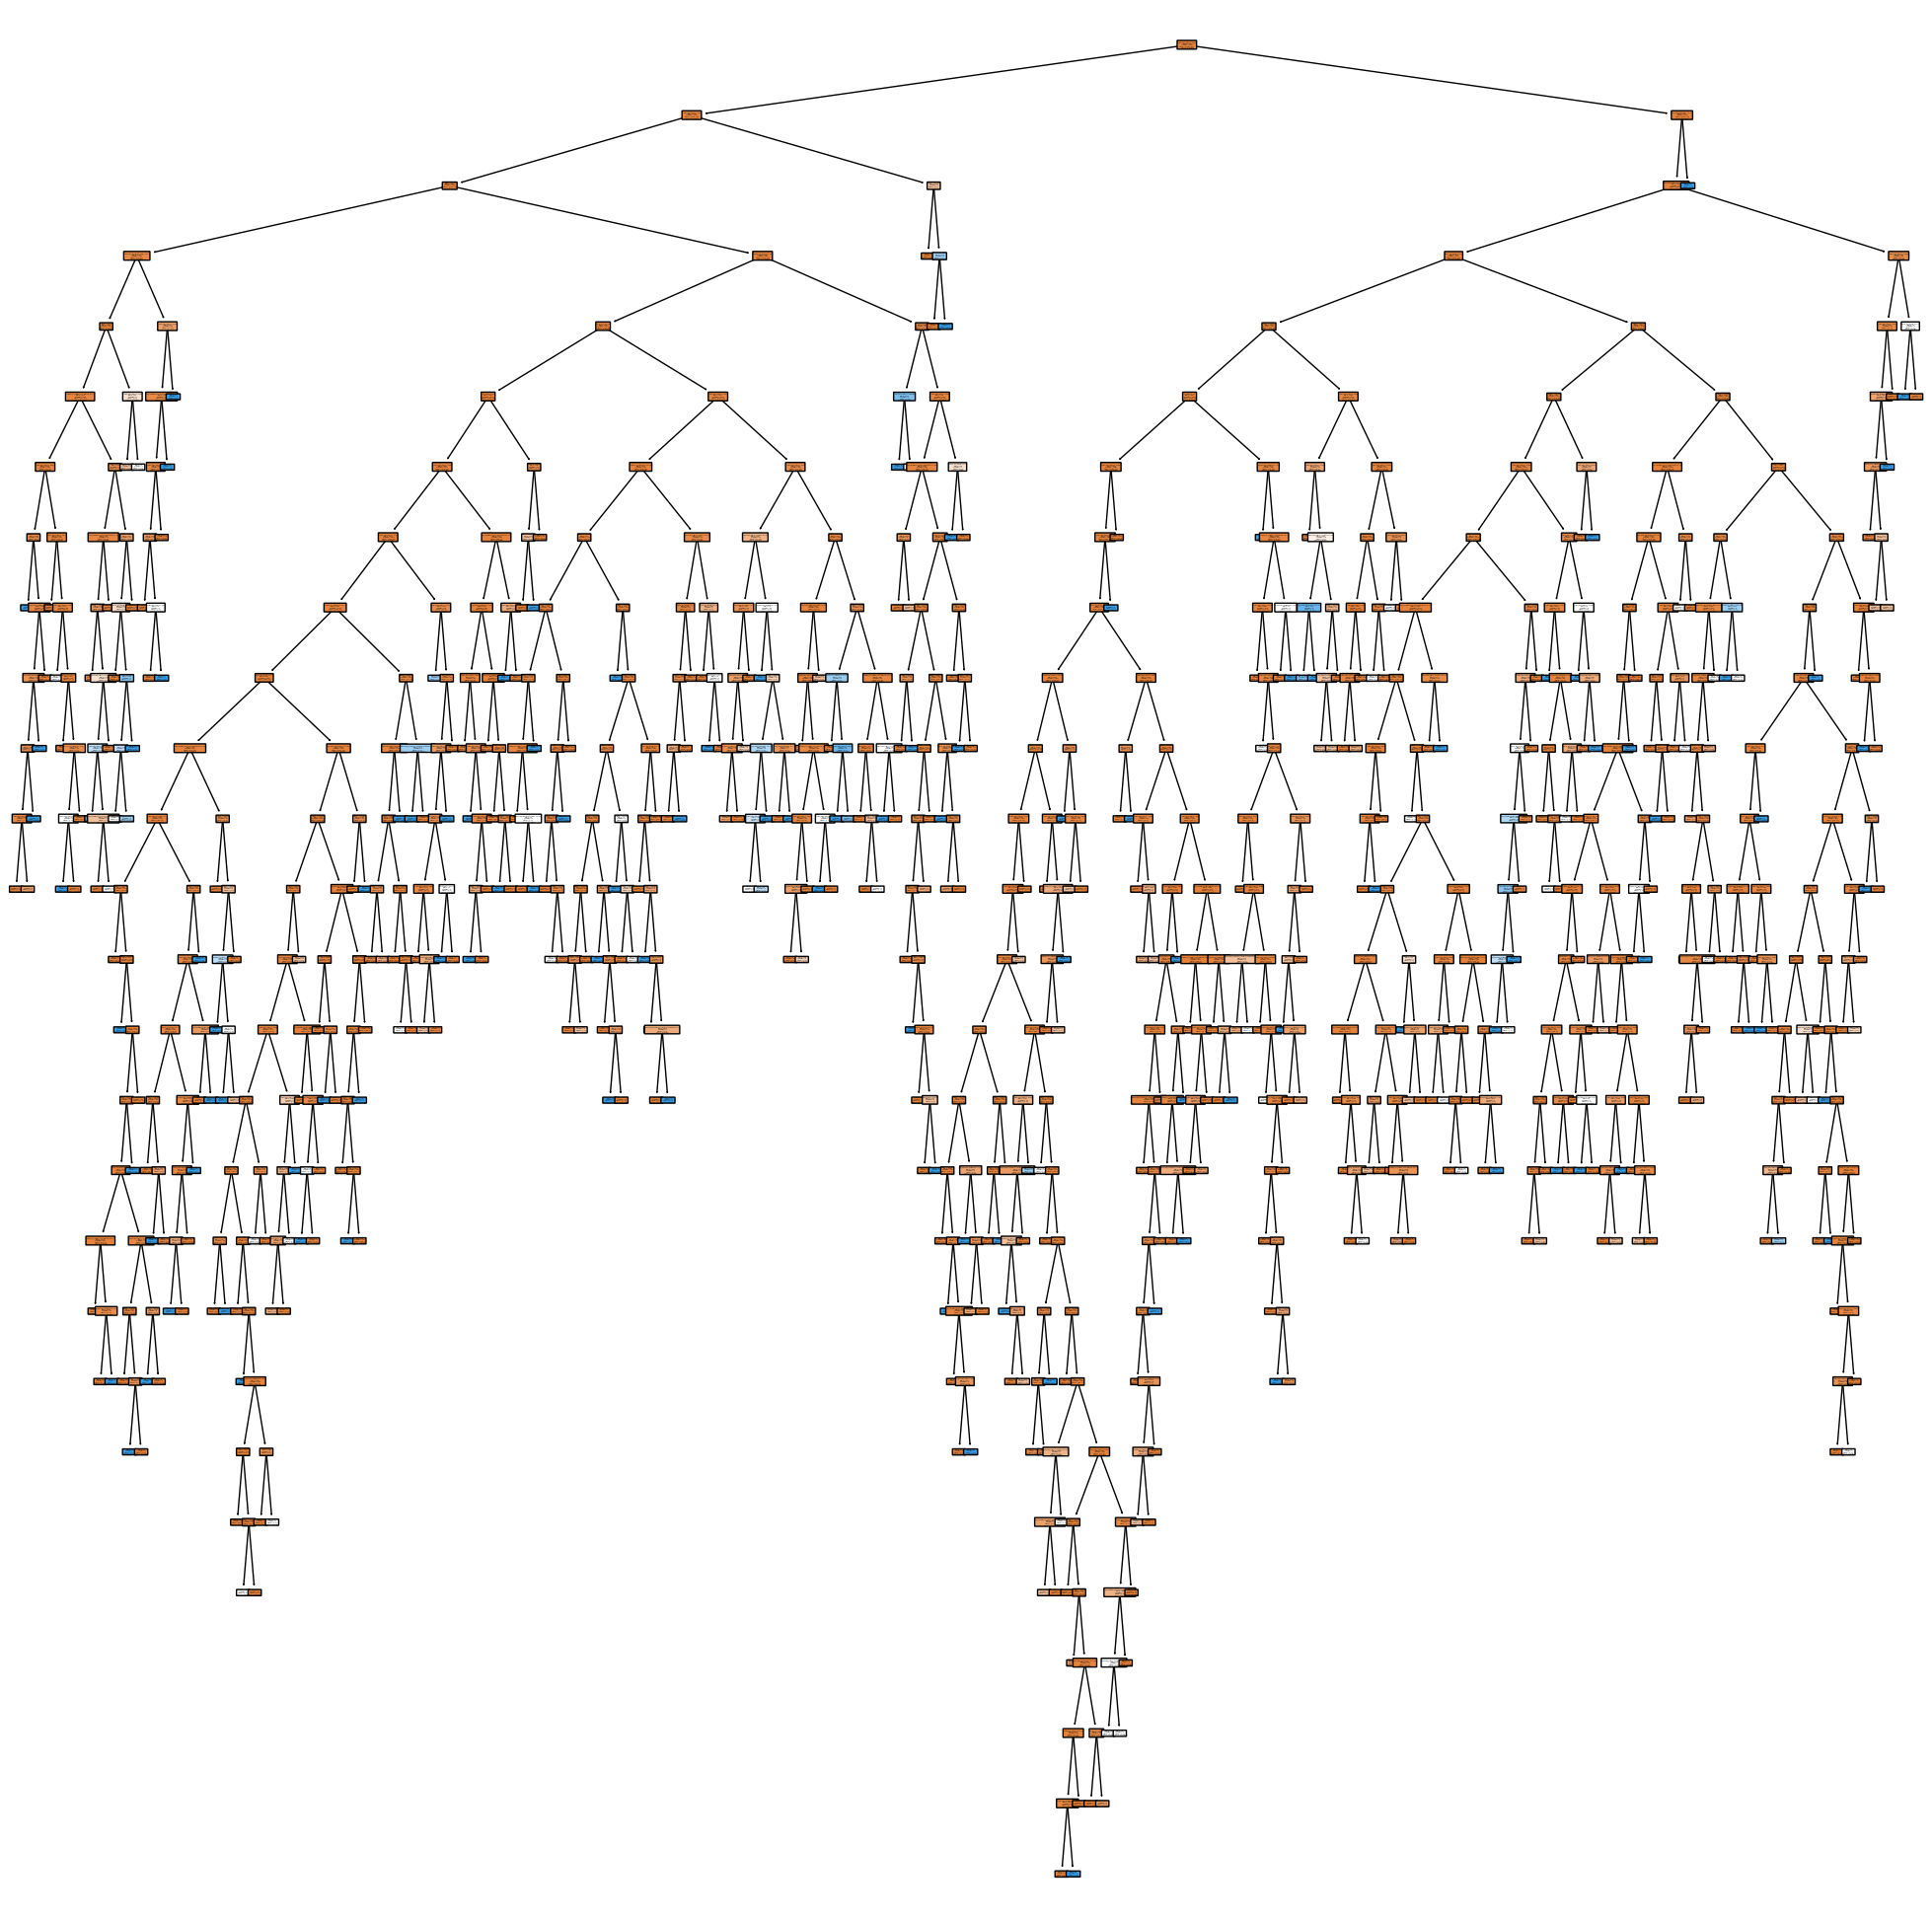

In [15]:
# Plotando a árvore de decisão da base treino
plt.figure(figsize=[25, 25])
plot_tree(clf,
         filled=True,
         rounded=True,
         class_names=['Aprovado', 'Reprovado'],
         feature_names=X.columns);

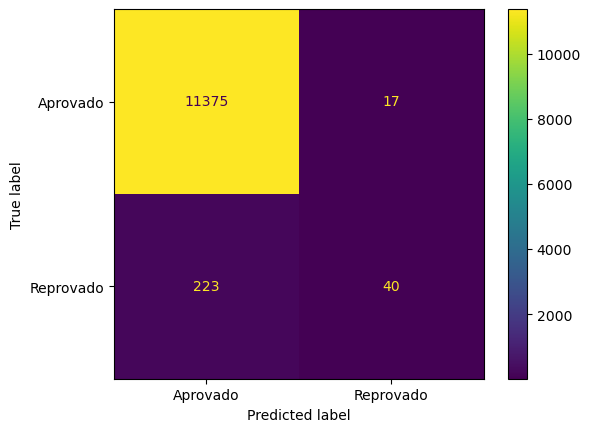

In [32]:
# Matriz da confusão da base treino
predictions = clf.predict(X_train)
cm = confusion_matrix(y_train, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Aprovado', 'Reprovado'])
disp.plot()

In [33]:
# Calculando acurácia da base treino
accuracy_score(y_train, predictions)

0.9794079794079794

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

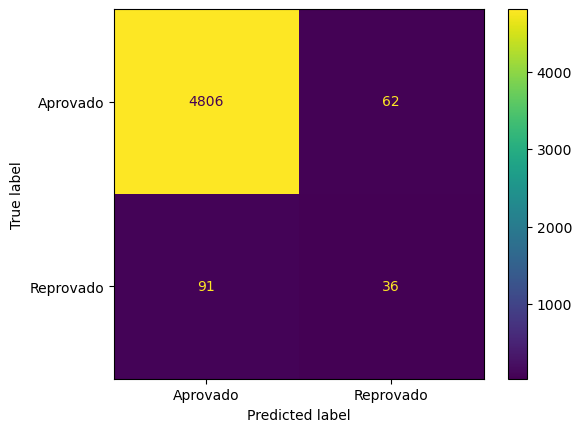

In [18]:
# Matriz de confusão da base teste
predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Aprovado', 'Reprovado'])
disp.plot()

In [19]:
# Calculando acurácia da base teste
accuracy_score(y_test, predictions)

0.9693693693693693

In [20]:
# Treinando uma nova árvore alterando o número de folhas
clf = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)
clf = clf.fit(X_train,y_train)
predict = clf.predict(X_test)

0.9727727727727727

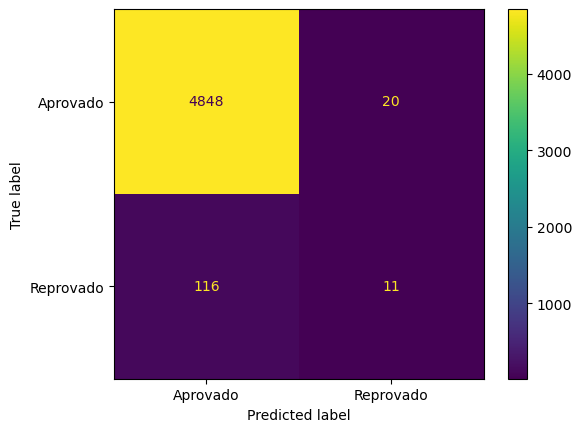

In [21]:
# Matriz de confusão da nova árvore de decisão reduzida
predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Aprovado', 'Reprovado'])
disp.plot()
accuracy_score(y_test, predict)

In [28]:
y_test.info

<bound method Series.info of 2875     0
2551     0
935      0
140      0
3048     0
        ..
7624     0
11130    0
7160     0
8231     0
15323    0
Name: mau, Length: 4995, dtype: int64>

In [29]:
y_test.value_counts()

0    4868
1     127
Name: mau, dtype: int64

Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

# Na base de testes temos 4995 contratos, e se classificarmos todos como "bons", teremos:
acurácia = total_bons / total, e o resultado seria = 1